In [1]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import sys

In [2]:
exp = 'B852'
yearmin=2015
yearmax=2100

In [3]:

outputdir = f'/ec/res4/scratch/nlcd/r9469-cmip6-bisi-knmi/{exp}/output/'
basal_file = f'{outputdir}/bisicles/csv/B852_basal.csv'
bm_file = f'{outputdir}/bisicles/csv/B852_bm.csv'
discharge_file = f'{outputdir}/bisicles/csv/B852_discharge.csv'

outputdir2 = f'/perm/nk0j/ecearth3-cmip6/runtime/classic/fwf/interactive/forcing_files/{exp}'
thetao_file = f'{outputdir2}/OceanSectorThetao_{exp}_{yearmin}_{yearmax}.csv'


print(discharge_file)


/ec/res4/scratch/nlcd/r9469-cmip6-bisi-knmi/B852/output//bisicles/csv/B852_discharge.csv


In [4]:
df_basal = pd.read_csv(basal_file)
df_bm = pd.read_csv(bm_file)
df_bm = df_bm *-1
df_discharge = pd.read_csv(discharge_file)
df_thetao = pd.read_csv(thetao_file)

<AxesSubplot:xlabel='year', ylabel='Ocean subsurface temperature [degC]'>

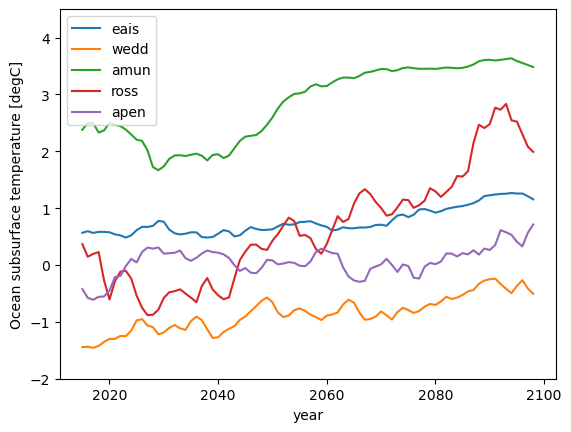

In [5]:
df_year=df_thetao['year']

df_thetao = df_thetao.set_index('year')
df_thetao.plot.line(y=['eais','wedd','amun','ross','apen'],ylabel='Ocean subsurface temperature [degC]',ylim=[-2,4.5])

In [121]:
df_thetao.loc[2080:2100].mean(axis=0)

eais    1.133202
wedd   -0.442276
amun    3.536430
ross    2.062629
apen    0.321162
dtype: float64

In [122]:
df_thetao.loc[2080:2100].mean(axis=0)-df_thetao.loc[2015:2035].mean(axis=0)

eais    0.535596
wedd    0.760515
amun    1.381202
ross    2.421701
apen    0.380574
dtype: float64

In [105]:
#df_basal = df_basal.set_index('year')
#df_basal = df_basal.rename(columns={'0':'fwf'})
#df_basal = df_basal -df_basal.loc[1850] #only show anomalous forcing
df_basal['year'] = df_thetao['year']
df_basal = df_basal.set_index('year')

<AxesSubplot:xlabel='year', ylabel='Basal melt freshwater fluxes (Gt/yr)'>

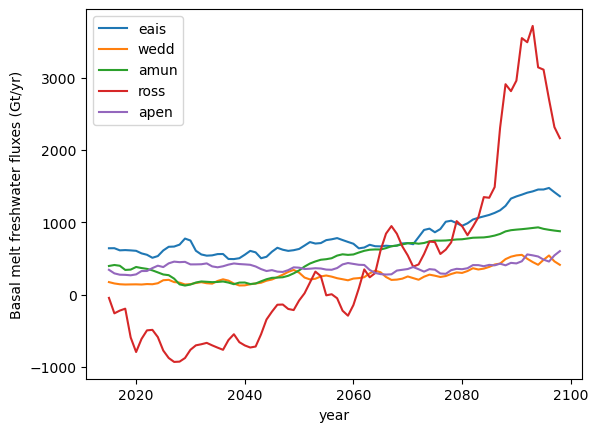

In [106]:
df_basal.plot.line(y=['eais','wedd','amun','ross','apen'],ylabel='Basal melt freshwater fluxes (Gt/yr)')

<AxesSubplot:xlabel='year', ylabel='Basal melt [m/yr]'>

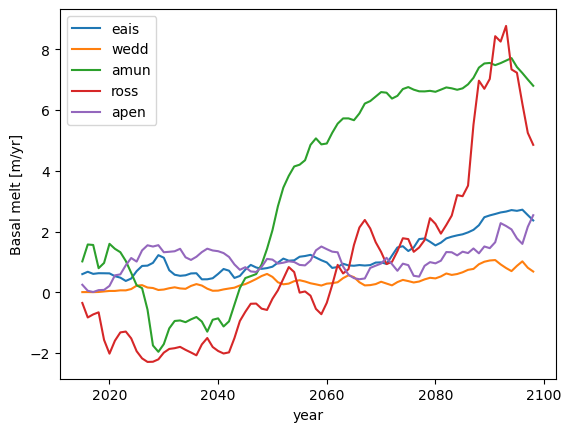

In [107]:
df_bm['year'] = df_thetao['year']
df_bm = df_bm.set_index('year')
df_bm.plot.line(y=['eais','wedd','amun','ross','apen'],ylabel='Basal melt [m/yr]')

<AxesSubplot:xlabel='year', ylabel='Discharge freshwater fluxes [Gt/yr]'>

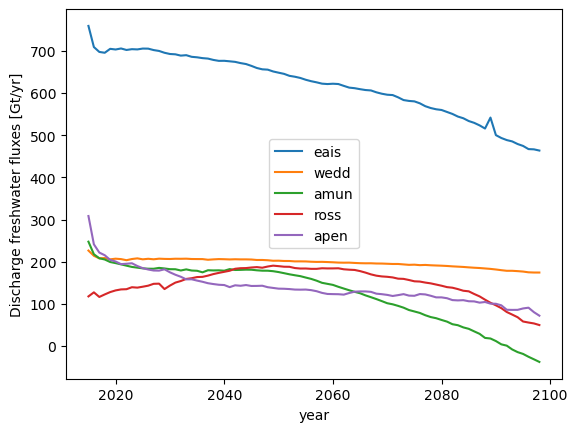

In [108]:
df_discharge['year'] = df_thetao['year']
df_discharge = df_discharge.set_index('year')
df_discharge.plot.line(y=['eais','wedd','amun','ross','apen'],ylabel='Discharge freshwater fluxes [Gt/yr]')

<AxesSubplot:xlabel='year', ylabel='Sum of basal melt freshwater fluxes [Gt/yr]'>

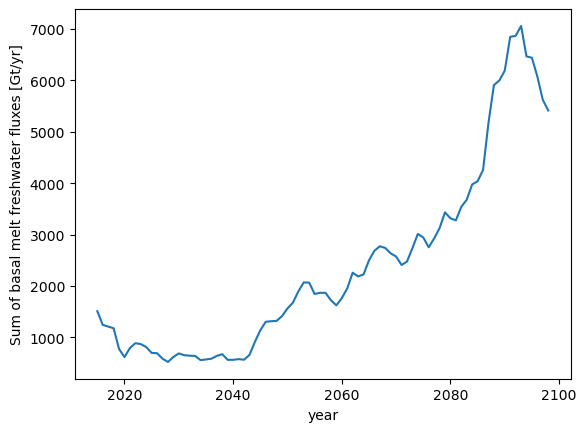

In [109]:

df_basal['anta']=df_basal[['eais','wedd','amun','ross','apen']].sum(axis=1)
df_basal.plot.line(y=['anta'],ylabel='Sum of basal melt freshwater fluxes [Gt/yr]',legend=None)

<AxesSubplot:xlabel='year', ylabel='Sum of discharge freshwater fluxes [Gt/yr]'>

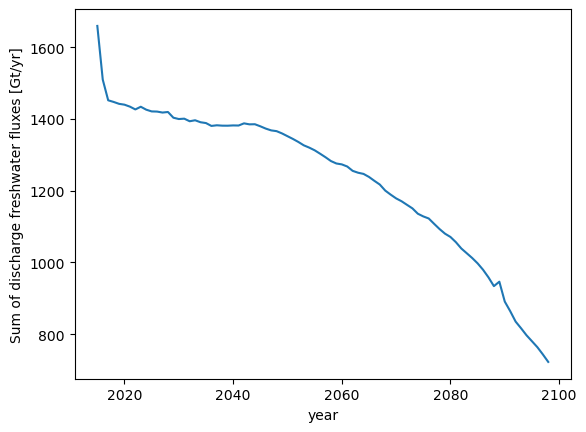

In [110]:
df_discharge['anta']=df_discharge[['eais','wedd','amun','ross','apen']].sum(axis=1)
df_discharge.plot.line(y=['anta'],ylabel='Sum of discharge freshwater fluxes [Gt/yr]',legend=None)

<AxesSubplot:xlabel='year', ylabel='Sum of freshwater fluxes [Gt/yr]'>

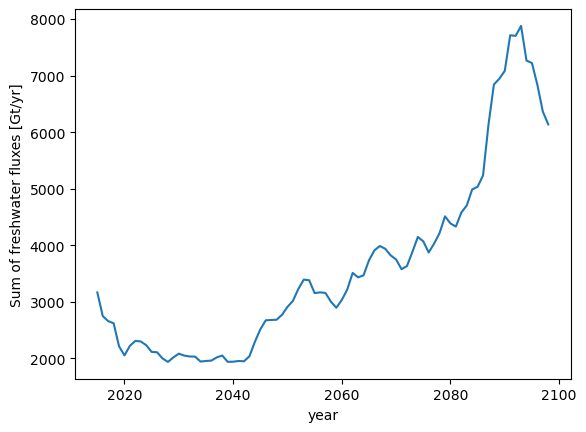

In [117]:
df_fwf_sum = df_basal['anta']+df_discharge['anta']
df_fwf_sum.plot.line(y=['anta'],ylabel='Sum of freshwater fluxes [Gt/yr]',legend=None)

In [115]:
output_FWF =f'{outputdir2}/TotalFreshwaterForcing_{exp}_{yearmin}_{yearmax}.csv'
print(output_FWF)

/perm/nk0j/ecearth3-cmip6/runtime/classic/fwf/interactive/forcing_files/B852/TotalFreshwaterForcing_B852_2015_2100.csv


In [116]:
df_fwf_sum.to_csv(output_FWF)
